In [1]:
import pandas as pd
import numpy as np
import seaborn as seab
import matplotlib.pyplot as plt

#Зчитуємо файл, але пропускаємо перші 4 рядки (там додаткова інформація, яка тут нам не потрібна
df = pd.read_excel("dds_ch2_rollingsales/rollingsales_bronx.xls",skiprows=4)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",,...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",,...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",,...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",,...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [3]:
#колонки, які є у файлі (властивості об'єкту)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5268 non-null   int64         
 1   NEIGHBORHOOD                    5268 non-null   object        
 2   BUILDING CLASS CATEGORY         5268 non-null   object        
 3   TAX CLASS AT PRESENT            5268 non-null   object        
 4   BLOCK                           5268 non-null   int64         
 5   LOT                             5268 non-null   int64         
 6   EASE-MENT                       5268 non-null   object        
 7   BUILDING CLASS AT PRESENT       5268 non-null   object        
 8   ADDRESS                         5268 non-null   object        
 9   APART
MENT
NUMBER               5268 non-null   object        
 10  ZIP CODE                        5268 non-null   int64         
 11  RESI

In [4]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APART\nMENT\nNUMBER               0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

[Text(0.5, 1.0, 'Продажі на район')]

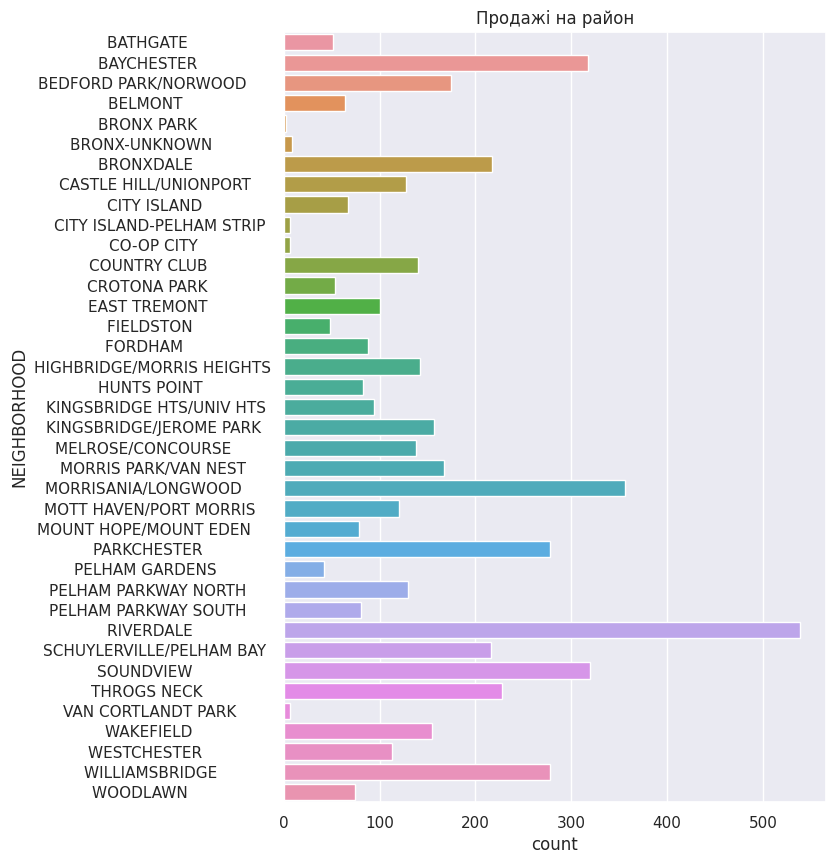

In [6]:
#seaborn, продажі на район
seab.set(rc={"figure.figsize": (7,10)})
seab.countplot(data=df,y="NEIGHBORHOOD").set(title="Продажі на район")

/tmp/ipykernel_75489/706498341.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seab.barplot(y='NEIGHBORHOOD',x='RESIDENTIAL UNITS',data=df.nlargest(5,['RESIDENTIAL UNITS']),ci=None).set(title="Продаж ЖИТЛОВИХ будівель (по районам)")


[Text(0.5, 1.0, 'Продаж ЖИТЛОВИХ будівель (по районам)')]

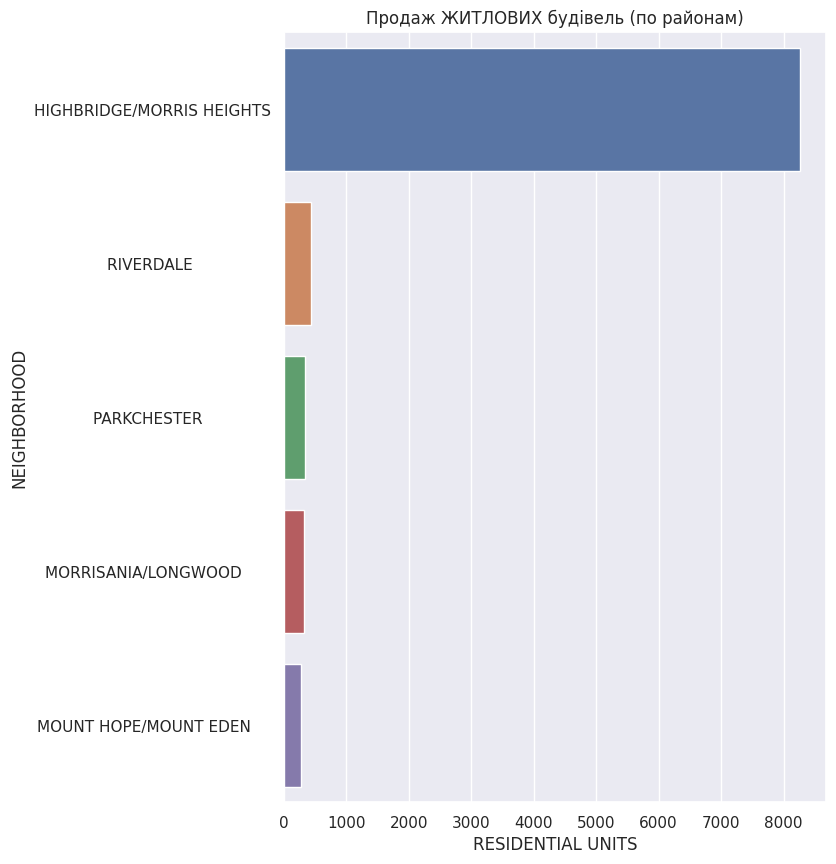

In [15]:
# тільки житлові будинки
#для взяття тільки топ-5 районів скористаємося функцією pandas nlargest
seab.barplot(y='NEIGHBORHOOD',x='RESIDENTIAL UNITS',data=df.nlargest(5,['RESIDENTIAL UNITS']),ci=None).set(title="Продаж ЖИТЛОВИХ будівель (по районам)")

/tmp/ipykernel_75489/4179118949.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seab.barplot(y='NEIGHBORHOOD',x='COMMERCIAL UNITS',data=df,ci=None).set(title="Продаж КОМЕРЦІЙНИХ будівель (по районам)")


[Text(0.5, 1.0, 'Продаж КОМЕРЦІЙНИХ будівель (по районам)')]

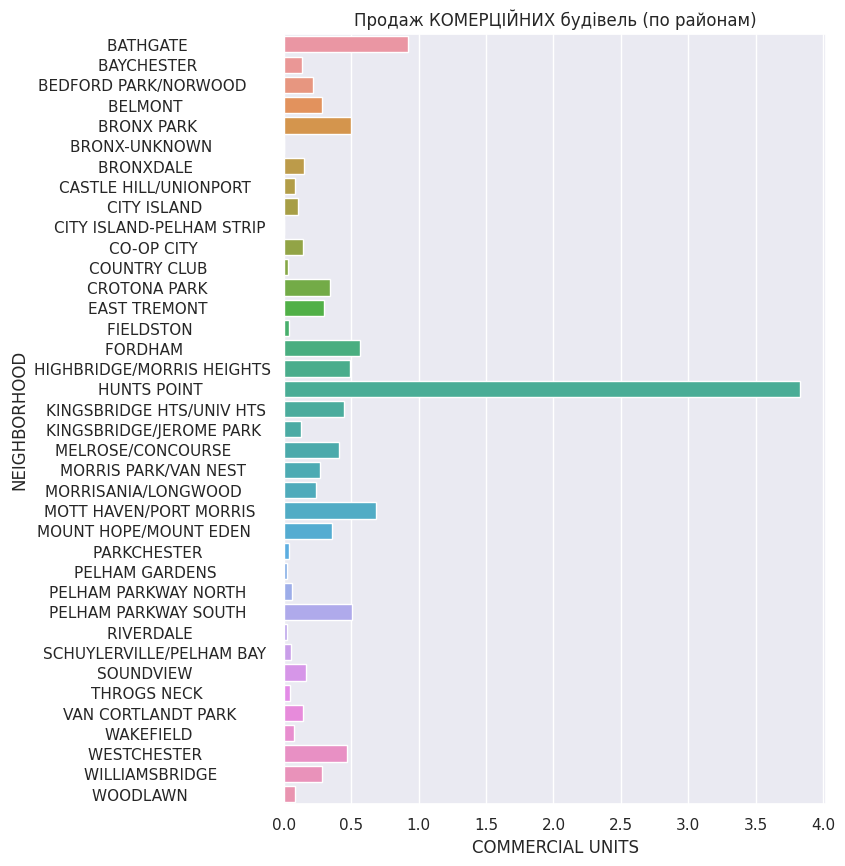

In [8]:
# тільки комерція (вибираємо відповідний стовпець COMMERCIAL UNITS з excel файлу
seab.barplot(y='NEIGHBORHOOD',x='COMMERCIAL UNITS',data=df,ci=None).set(title="Продаж КОМЕРЦІЙНИХ будівель (по районам)")

[Text(0.5, 1.0, 'Групування за роками побудови')]

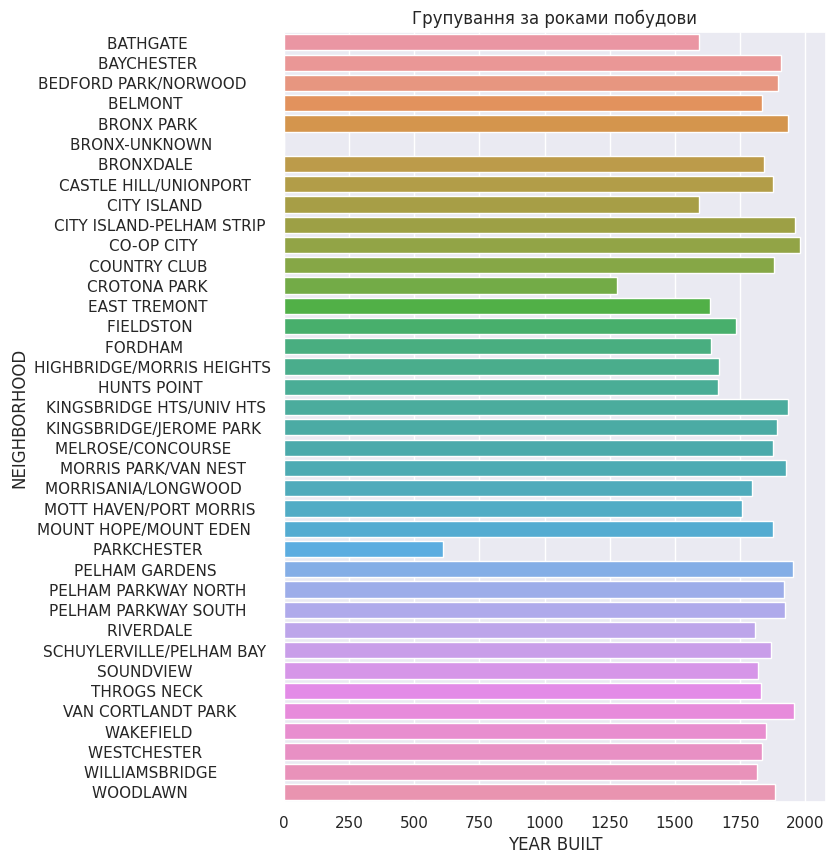

In [9]:
seab.barplot(y='NEIGHBORHOOD',x='YEAR BUILT',data=df,errorbar=None).set(title="Групування за роками побудови")

/tmp/ipykernel_75489/2530393114.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prices_over_1mln=df[['SALE PRICE','YEAR BUILT']][df['SALE PRICE']>1000000][df['YEAR BUILT']>1900]


<AxesSubplot: title={'center': 'Продані дорожче 1млн'}, xlabel='YEAR BUILT', ylabel='продажна ціна'>

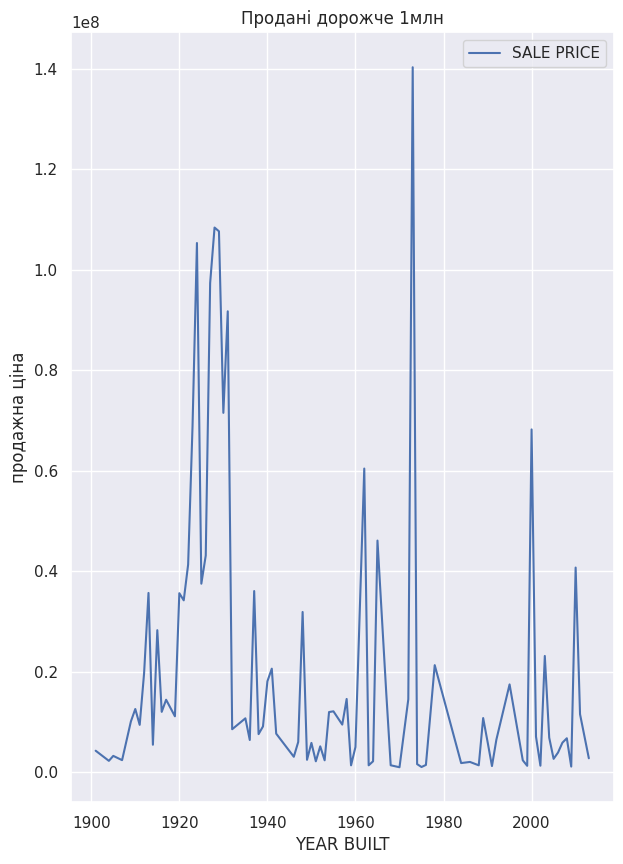

In [10]:
# знаходимо ціни більше млн та рік побудови більше 1900
prices_over_1mln=df[['SALE PRICE','YEAR BUILT']][df['SALE PRICE']>1000000][df['YEAR BUILT']>1900]
prices_over_1mln.groupby('YEAR BUILT').sum().plot(y='SALE PRICE',ylabel='продажна ціна', title='Продані дорожче 1млн')

/tmp/ipykernel_75489/3585070569.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  years=df.groupby(df["SALE DATE"].dt.year).sum()


<AxesSubplot: title={'center': 'ціна продажу в 12-ому та 13-ому році'}, xlabel='рік продажу', ylabel='ціна продажу'>

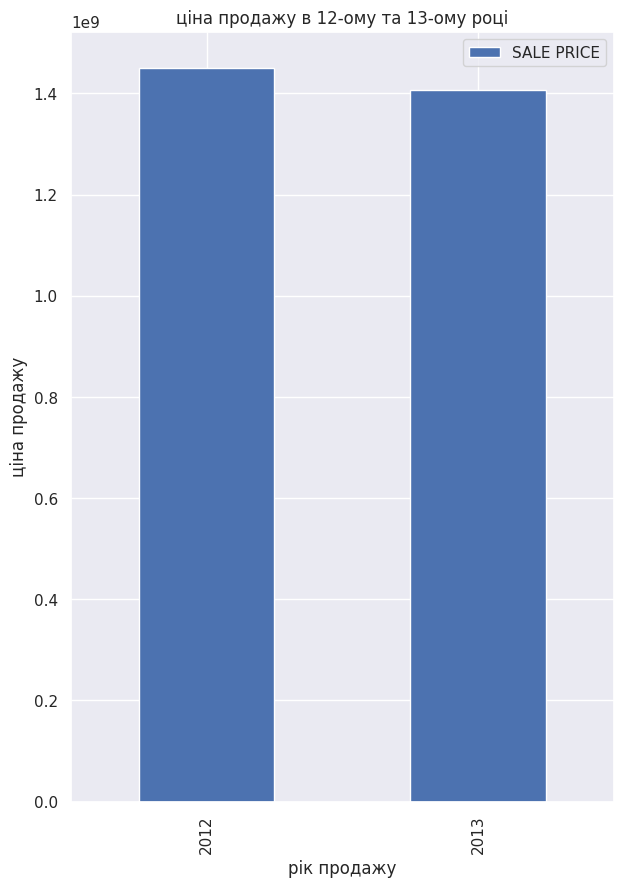

In [11]:
# так як у нас є дані лише за 2 роки продажу (12, 13), то порівнюємо їх
years=df.groupby(df["SALE DATE"].dt.year).sum()
years.plot(kind='bar',y='SALE PRICE',xlabel='рік продажу',ylabel='ціна продажу',title='ціна продажу в 12-ому та 13-ому році')

<AxesSubplot: xlabel='класова категорія будівлі', ylabel='Середнє значення ціни'>

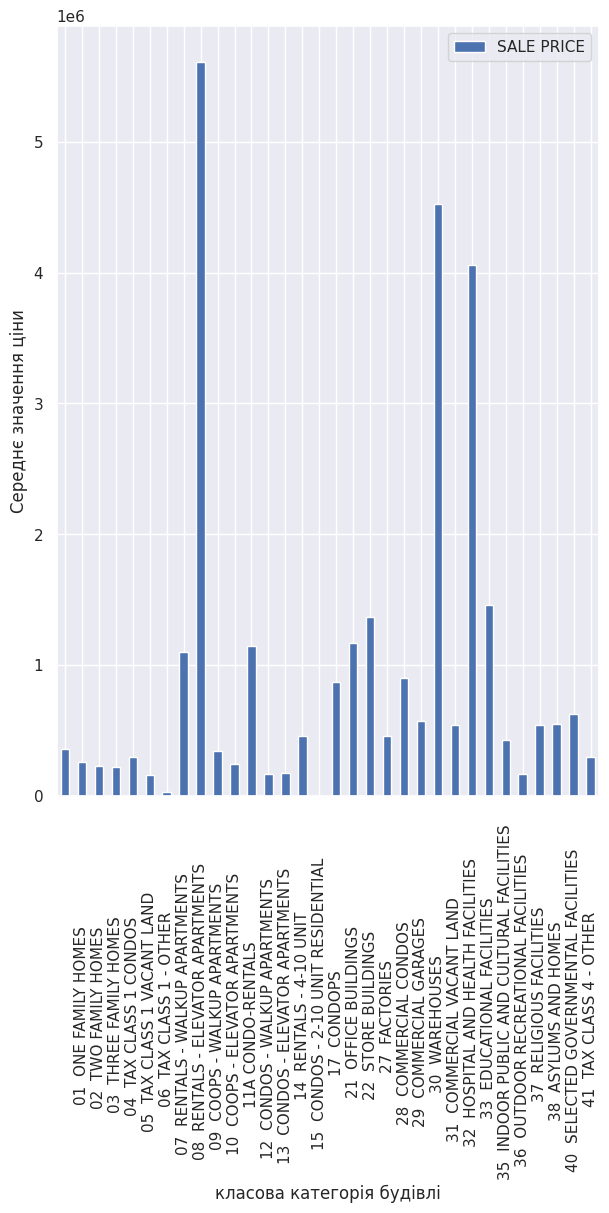

In [12]:
# беремо з файлу параметр КАТЕГОРІЯ БУДІВЛІ та групуємо їх згідно середніх цін
building_class_category=df.groupby("BUILDING CLASS CATEGORY")[["SALE PRICE"]].mean()
building_class_category.plot(kind='bar',xlabel="класова категорія будівлі",ylabel="Середнє значення ціни")

In [13]:
# Отримуємо значення класів будівель в момент продажу
# Функією unique обираємо лише унікальні значення

buildings_classes_time_of_sale=df['BUILDING CLASS AT TIME OF SALE'].unique()
buildings_classes_time_of_sale

array(['A5', 'A1', 'S2', 'B1', 'B3', 'B2', 'C0', 'V0', 'C1', 'C4', 'C7',
       'D4', 'S9', 'S4', 'K1', 'K2', 'K4', 'F5', 'G9', 'G2', 'G7', 'E7',
       'V9', 'V1', 'Z9', 'A9', 'A2', 'B9', 'R3', 'Z0', 'G0', 'C3', 'C9',
       'O1', 'O9', 'O5', 'O6', 'R5', 'G8', 'G4', 'E1', 'E9', 'E3', 'C2',
       'D1', 'D7', 'C6', 'O7', 'K9', 'F4', 'G5', 'G6', 'S1', 'D9', 'R4',
       'S3', 'O8', 'K5', 'D3', 'RG', 'A6', 'R2', 'Q8', 'Z6', 'A7', 'A3',
       'RR', 'A0', 'Q1', 'N9', 'M1', 'V3', 'C5', 'D5', 'D6', 'R9', 'G1',
       'I5', 'RK', 'F9', 'E4', 'Y6', 'W6', 'RP', 'RS', 'R6', 'P8', 'I9',
       'S5', 'W1', 'M9', 'P5', 'W3', 'I6', 'W2', 'F1', 'W4', 'RB', 'A4',
       'S0', 'R1', 'I1', 'M3'], dtype=object)